http://www.statiz.co.kr/main.php 에서 정보를 수집

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.unicode_minus'] = False

## 데이터를 불러온다.

### 투수 데이터 (picher.csv)

In [2]:
picher = pd.read_csv('data10/picher_stats_2017.csv')

In [3]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [4]:
# 컬럼 정보 확인
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [5]:
# 결측치 확인
picher.isna().sum()

선수명         0
팀명          0
승           0
패           0
세           0
홀드          0
블론          0
경기          0
선발          0
이닝          0
삼진/9        0
볼넷/9        0
홈런/9        0
BABIP       0
LOB%        0
ERA         0
RA9-WAR     0
FIP         0
kFIP        0
WAR         0
연봉(2018)    0
연봉(2017)    0
dtype: int64

In [6]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

In [7]:
# by = 컬럼명 을 기준으로 정렬
picher.sort_values(by='연봉(2018)', ascending=False).head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
20,정우람,한화,6,4,26,0,5,56,0,59.0,...,0.76,0.304,79.4,2.75,2.85,3.26,2.69,1.81,120000,120000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


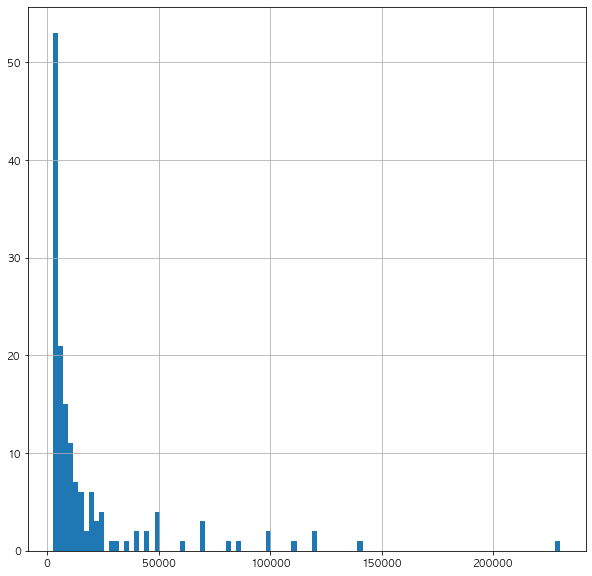

In [8]:
# 히스토그램으로 확인
# 중간값을 기준으로 분포를 확인
picher['연봉(2018)'].hist(bins=100)
plt.show()

In [9]:
picher['연봉(2018)'].value_counts()

4000      9
3000      9
6000      6
2900      5
4200      4
         ..
7300      1
16000     1
60000     1
5500      1
230000    1
Name: 연봉(2018), Length: 67, dtype: int64

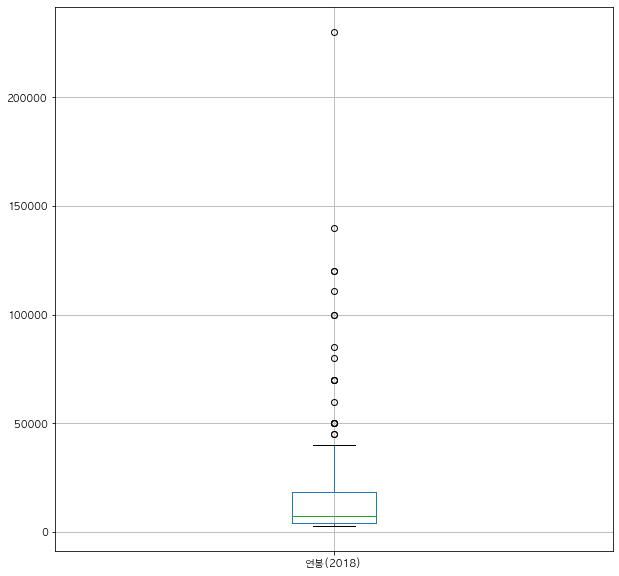

In [10]:
# o으로 표시되는 부분은 이상치 
# 편차의 정도를 확인 가능
picher.boxplot(column=['연봉(2018)'])
plt.show()

#### 회귀 분석에서 사용할 피처 살펴보기

In [11]:
# 컬럼 종류 파악
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [12]:
# 선수명과 팀명을 날려준다.
picher2 = picher.drop(['선수명','팀명'], axis=1)

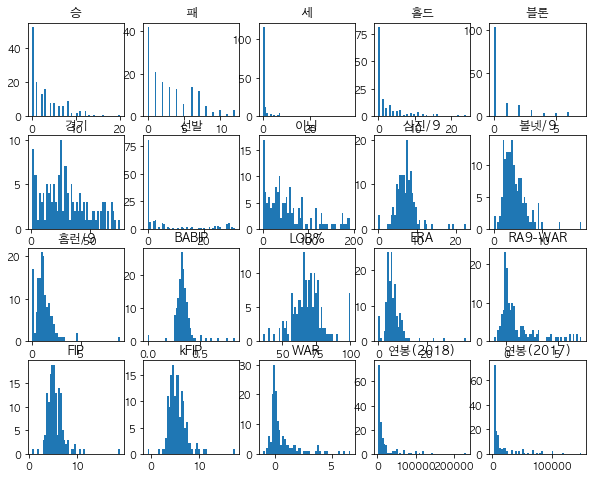

In [13]:
fig = plt.figure(1)

# 컬럼의 수 만큼 반복한다.
for i in range(len(picher2.columns)) :
    # 서브플롯 생성
    ax = fig.add_subplot(5, 5, i + 1)
    
    # 히스토그램을 그린다.
    plt.hist(picher2[picher2.columns[i]], bins=50)
    
    # 타이틀
    ax.set_title(picher2.columns[i])

plt.show()

#### 투수 연봉 예측하기

In [14]:
# 각 특성에 대해 표준화 작업을 하는 함수
def standard_scaling(df, scale_columns):
    # 컬럼의 수만큼 반복
    for col in scale_columns:
        # 해당 컬럼의 평균값을 구한다.
        series_mean = df[col].mean()
        
        # 해당 컬럼의 표준편차를 구한다.
        series_std = df[col].std()
        
        # 표준값을 계산한다.
        df[col] = df[col].apply(lambda x : (x-series_mean)/series_std)
        
    return df

In [15]:
# 불필요한 컬럼을 제거한다.
picher_df = picher.drop('선수명', axis=1)
picher_df.columns

Index(['팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [16]:
# 입력과 결과로 나눈다.
X = picher_df.drop('연봉(2018)', axis=1)
y = picher_df['연봉(2018)']

In [17]:
# 팀명을 숫자로 변환한다. 
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
encoder1.fit(X['팀명'])
X['팀명'] = encoder1.transform(X['팀명'])
X['팀명'].value_counts()

8    20
7    20
1    19
4    18
2    18
5    15
0    15
6    14
3    13
Name: 팀명, dtype: int64

In [18]:
# 표준화작업
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[-0.04225053,  3.32457765,  1.23120199, ..., -1.06162315,
         4.51802888,  2.74374569],
       [-0.7977895 ,  2.02618144,  2.51300132, ..., -1.07681252,
         4.10827019,  1.34172411],
       [-1.55332846,  4.36329461,  0.91075216, ..., -0.86922457,
         3.77439273,  5.34750005],
       ...,
       [ 0.71328843, -0.8302902 , -0.37104718, ...,  1.39399038,
        -0.9681847 , -0.02023971],
       [ 1.09105791, -0.8302902 , -0.05059734, ...,  0.71553221,
        -1.03647782, -0.54499636],
       [-1.17555898,  0.20842676,  0.26985249, ...,  1.15096059,
        -1.27170966, -0.54099058]])

In [19]:
# 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

X = X_train
y = y_train


In [20]:
# 모델 생성
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# 폴드 생성
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# 하이퍼 파라미터 튜닝
params = {
    # 트리의 개수
    'n_estimators' : [10,50,100,150,200],
    # 질문 깊이
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

# tree_method='gpu_hist' : gpu사용 더 깊게 학습시키기 위해서 사용, max_depth에 None도 추가
model = XGBRegressor(silent=True, verbosity=0)

# 하이퍼 파라미터 튜닝
grid = GridSearchCV(model, param_grid=params, scoring='r2', cv=kfold)
grid.fit(X,y)

print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
print(f'최적의 모델 평균 성능 : {grid.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 2, 'n_estimators': 10}
최적의 모델 평균 성능 : 0.8308533377310086


In [21]:
# 최적의 하이퍼파라미터가 셋팅된 모델을 추출한다.
best_model = grid.best_estimator_
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [22]:
# 교차검증
result = cross_val_score(best_model, X, y, scoring='r2', cv=kfold)
result

array([0.3587847 , 0.75257661, 0.76142437, 0.9770516 , 0.65597915,
       0.98131698, 0.95633421, 0.97498116, 0.93060483, 0.95947976])

In [23]:
# 결과를 예측한다.
y_pred = best_model.predict(X_test)
y_pred[:10]

array([12058.827 , 19922.162 ,  4818.755 ,  8370.654 ,  7331.5137,
        4818.755 ,  4818.755 , 14756.983 ,  5994.17  , 41053.863 ],
      dtype=float32)

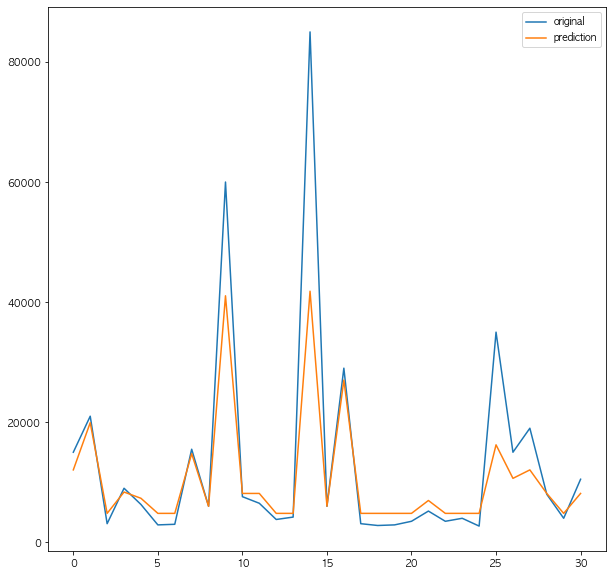

In [34]:
# 진짜 결과와 예측결과를 그래프로 확인한다.
plt.plot(y_test.values, label='original')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()

---

### 타자 데이터 (batter.csv)

In [25]:
batter = pd.read_csv('data10/batter_stats_2017.csv')

In [26]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [27]:
# 컬럼 정보 확인
batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    object 
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

In [28]:
# 결측치 확인
batter.isna().sum()

선수명         0
팀명          0
경기          0
타석          0
타수          0
안타          0
홈런          0
득점          0
타점          0
볼넷          0
삼진          0
도루          0
BABIP       0
타율          0
출루율         0
장타율         0
OPS         0
wOBA        0
WAR         0
연봉(2018)    0
연봉(2017)    0
dtype: int64

In [29]:
# by = 컬럼명 을 기준으로 정렬
batter.sort_values(by='연봉(2018)', ascending=False).head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
16,이대호,롯데,142,608,540,173,34,73,111,50,...,1,0.327,0.320,0.391,0.533,0.924,0.388,3.86,250000,250000
22,김태균,한화,94,407,356,121,17,51,76,43,...,0,0.362,0.340,0.413,0.545,0.958,0.401,2.96,160000,160000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000
10,러프,삼성,134,591,515,162,31,90,124,60,...,2,0.344,0.315,0.396,0.569,0.965,0.402,4.59,140000,110000


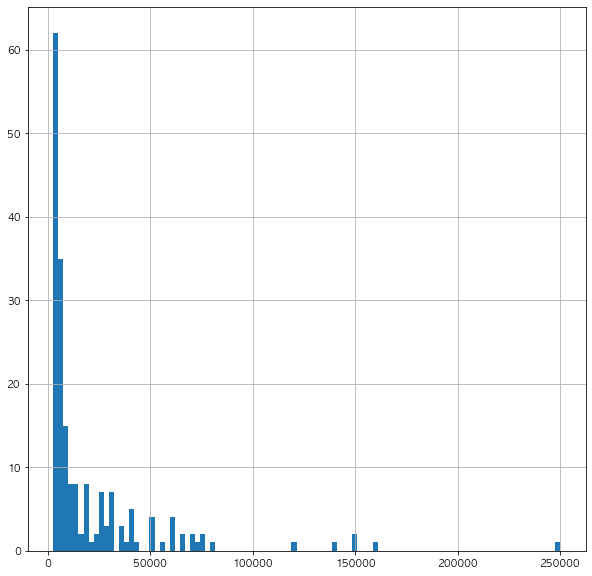

In [30]:
# 히스토그램으로 확인
# 중간값을 기준으로 분포를 확인
batter['연봉(2018)'].hist(bins=100)
plt.show()

In [31]:
batter['연봉(2018)'].value_counts()

3000      11
3300       6
6200       5
7000       5
4500       5
          ..
16000      1
8600       1
15500      1
250000     1
43000      1
Name: 연봉(2018), Length: 80, dtype: int64

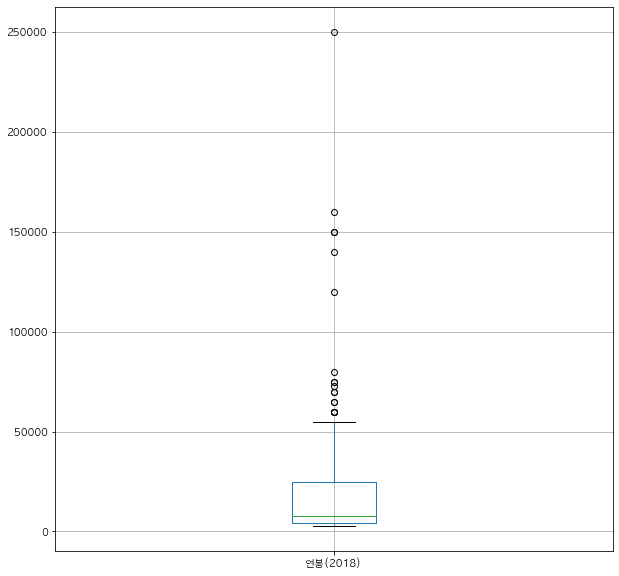

In [32]:
batter.boxplot(column=['연봉(2018)'])
plt.show()